In [11]:
# file_path = "../results/OpenBCI_GUI/OpenBCI-RAW-2024-08-15_14-18-15.txt"
# file_path = "../results/OpenBCI_GUI/OpenBCI-RAW-2024-08-15_14-59-52.txt"
# file_path = "../results/OpenBCI_GUI/OpenBCI-RAW-2024-08-15_15-02-41.txt"
file_path = "../results/OpenBCI_GUI/OpenBCI-RAW-2024-08-15_15-05-37.txt"

signals = []
with open(file_path, "r") as file:
    for line in file:
        if line.startswith("%") or line.startswith("Sample Index"):
            continue

        data = [ float(x.strip()) for x in line.split(",")[1:2] ]
        signals.extend(data)

start_at_seconds = 12
data = signals[start_at_seconds*250:]
print(len(data))

12141


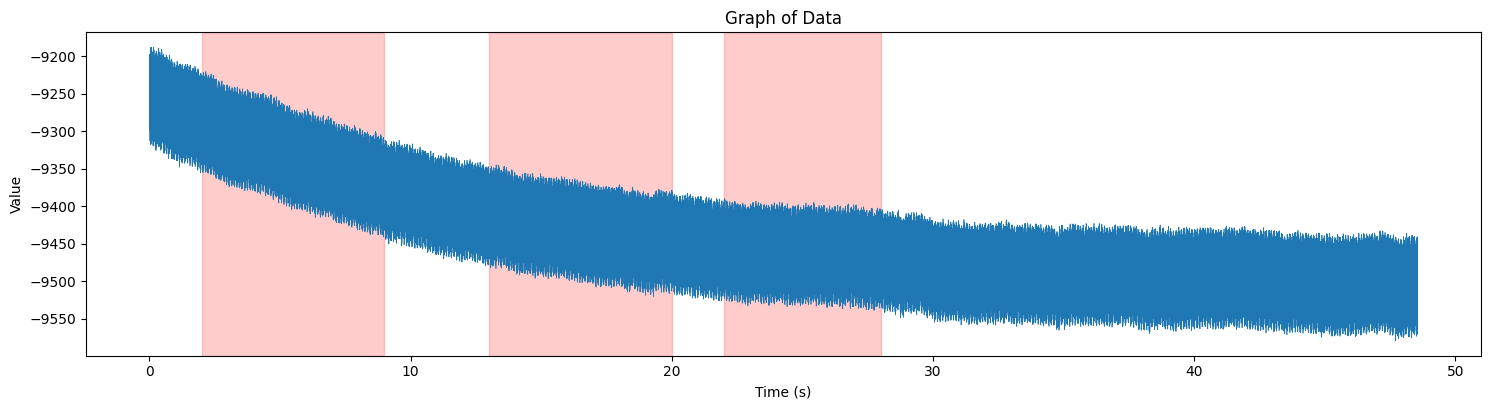

In [12]:
import matplotlib.pyplot as plt

time = [i/250 for i in range(len(data))]
# periods = [ (2, 9), (13, 20), (23, 24) ]
periods = [ (2, 9), (13, 20), (22, 28) ]

plt.figure(figsize=(18, 4.2))
plt.plot(time, data, linewidth=0.5)
for period in periods:
    plt.axvspan(period[0], period[1], color='red', alpha=0.2)
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Graph of Data')
plt.show()

In [13]:
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter to obtain the drifting baseline
window_length = 51
polyorder = 3
baseline = savgol_filter(data, window_length, polyorder)

# Subtract the baseline from the data
data = data - baseline

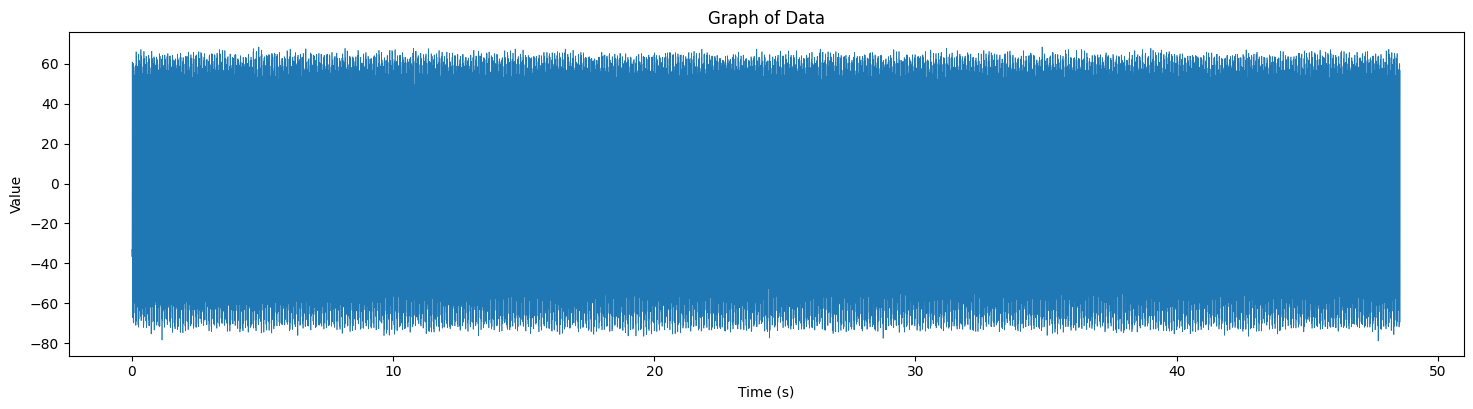

In [14]:
import matplotlib.pyplot as plt

time = [i/250 for i in range(len(data))]
# periods = [ (2, 9), (13, 20), (23, 24) ]
# periods = [ (2, 9), (13, 20), (22, 28) ]

plt.figure(figsize=(18, 4.2))
plt.plot(time, data, linewidth=0.5)
# for period in periods:
#     plt.axvspan(period[0], period[1], color='red', alpha=0.2)
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Graph of Data')
plt.show()

Text(0.5, 0, 'Time (s)')

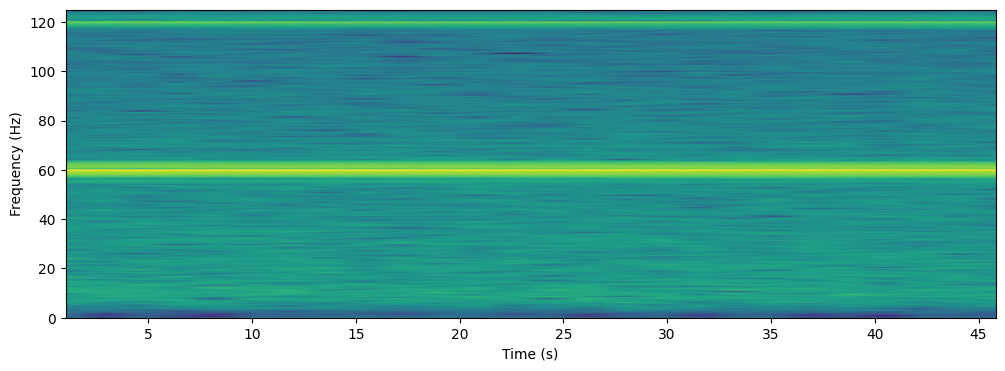

In [15]:
import numpy as np
from scipy import signal

f, t, Sxx = signal.spectrogram(np.array(data), 250, nperseg=512)
plt.figure(figsize=(12, 4))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')